In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
data = pd.read_csv('bread_basket.csv')
print("Data has been loaded successfully",data.shape)
data.head()

Data has been loaded successfully (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [49]:
# Format data waktu
#Kode tersebut menggunakan library pandas untuk mengonversi kolom 'date_time' dalam DataFrame 
#'data' menjadi tipe data datetime. Format waktu yang diinginkan adalah 'dd-mm-yyyy HH:MM'.
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M')

In [50]:
data["date_time"].dtype

dtype('<M8[ns]')

In [51]:
#Kode tersebut menambahkan tiga kolom baru ke dalam DataFrame 'data':

#1. Kolom "month" berisi nilai bulan dari tanggal yang terdapat dalam kolom "date_time". Ini diambil dari atribut dt.month yang mengembalikan bulan dalam rentang 1-12.
#2. Kolom "day" berisi nilai jam dari tanggal yang terdapat dalam kolom "date_time". Ini diambil dari atribut dt.hour yang mengembalikan jam dalam rentang 0-23.
#3. Kolom "hour" berisi nilai hari dalam seminggu (mulai dari Senin dengan nilai 0 dan Minggu dengan nilai 6) dari tanggal yang terdapat dalam kolom "date_time". Ini diambil dari atribut dt.weekday.
#Kemudian, hasilnya ditampilkan dengan memanggil fungsi head() untuk melihat lima baris pertama dari DataFrame yang telah dimodifikasi.

data["month"] = data["date_time"].dt.month
data["day"] = data["date_time"].dt.hour
data["hour"] = data["date_time"].dt.weekday
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,9,6
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10,6
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,10,6
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,10,6
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,10,6


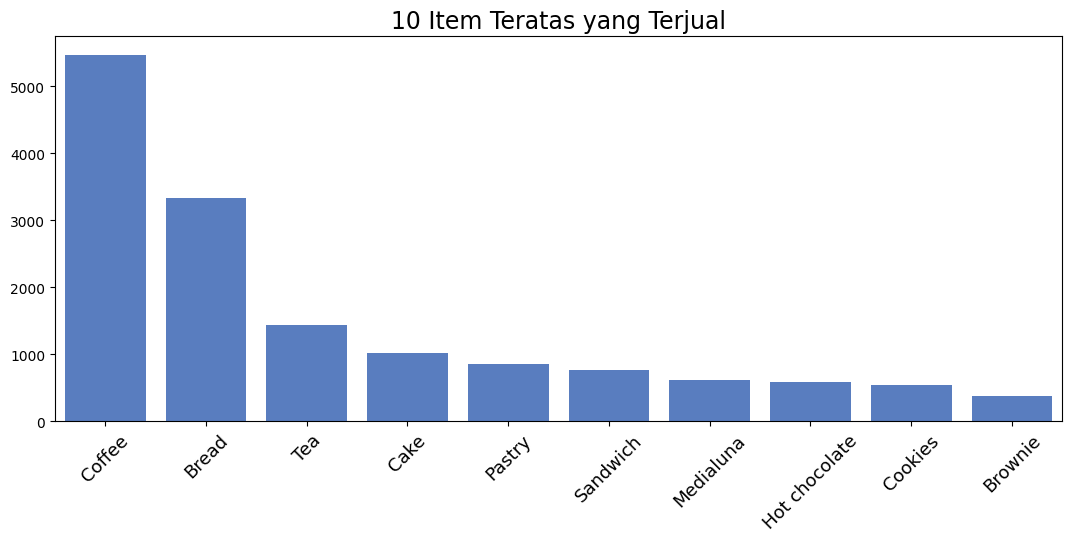

In [52]:
# menampilkan 10 item teratas

plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = data['Item'].value_counts()[:10].index,
            y = data['Item'].value_counts()[:10].values)
plt.xlabel('');plt.ylabel('')
plt.xticks(size=13,rotation=45)
plt.title('10 Item Teratas yang Terjual',size=17)
plt.show()

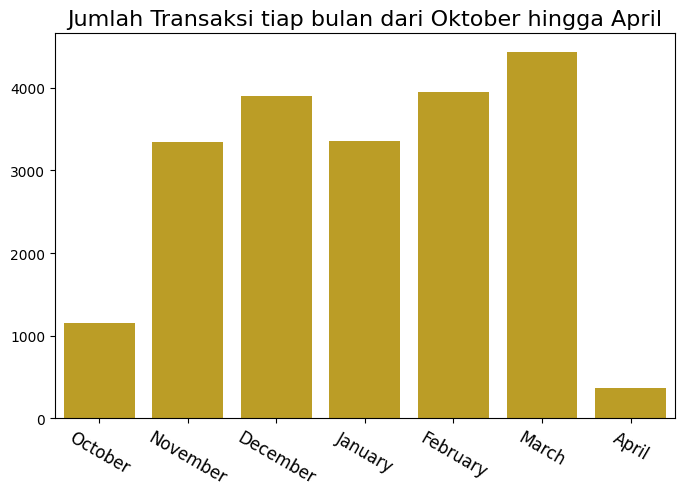

In [64]:
data_perbulan = data.groupby(data["date_time"].dt.month_name())['Transaction'].count()
                          
plt.figure(figsize=(8,5))
sns.barplot(x = ["October","November","December","January","February","March","April"],
            y = data_perbulan.values, color="#D4AC0D")
plt.xticks(size=12, rotation=-30)
plt.title('Jumlah Transaksi tiap bulan dari Oktober hingga April', size=16)
plt.show()


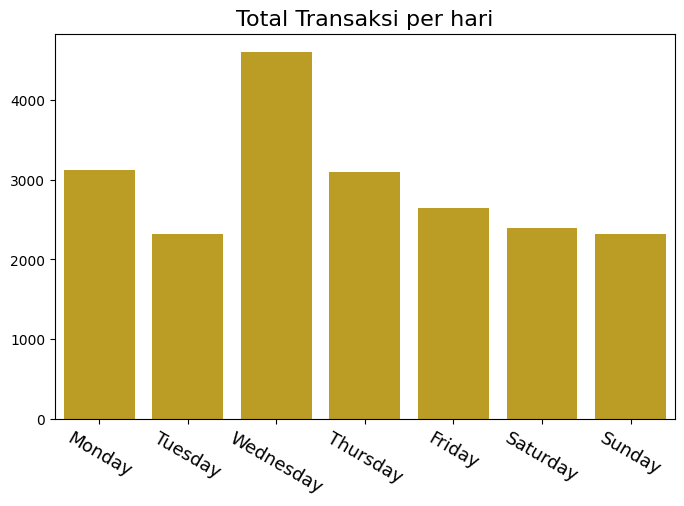

In [ ]:
data_perday = data.groupby(data["date_time"].dt.day_name())['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(x = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
            y = data_perday.values, color="#D4AC0D")
plt.xticks(size=13, rotation=-30)
plt.title('Total Transaksi per hari', size=16)
plt.show()


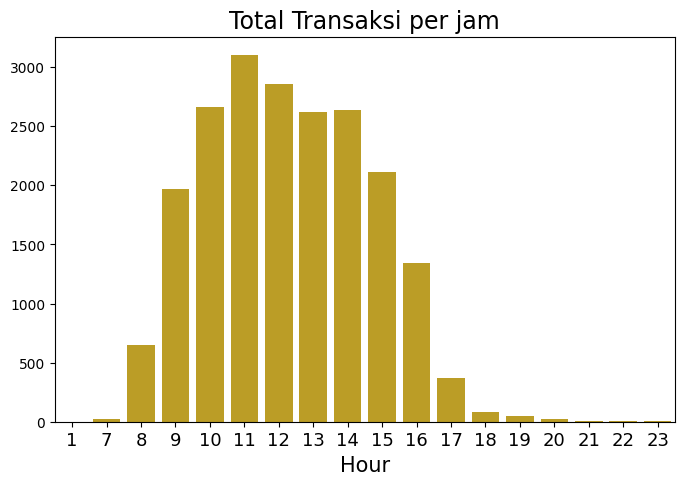

In [67]:
data_perhour = data.groupby(data["date_time"].dt.hour)['Transaction'].count()

plt.figure(figsize=(8,5))
sns.barplot(x = data_perhour.index,
            y = data_perhour.values, color="#D4AC0D")
plt.xlabel('Hour',size=15)
plt.xticks(size=13)
plt.title('Total Transaksi per jam', size=17)
plt.show()

In [68]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [69]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [71]:
data = data[['Transaction', 'Item']].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [74]:
from mlxtend.frequent_patterns import apriori, association_rules

In [73]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.2.1 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
  Obtaining dependency information for scikit-learn>=1.0.2 from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=0.13.


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
item_count = data.groupby(['Transaction', 'Item'])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [78]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :" ,item_count_pivot.shape)
item_count_pivot.head(10)


# kalo yang kebeli itu 1 kalo 0 gaada yabng beli

Ukuran Dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
def endcode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
item_count_pivot = item_count_pivot.applymap(endcode_units)
item_count_pivot.head(10)

C:\Users\raul mahya komaran\AppData\Local\Temp\ipykernel_31688\1810997809.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  item_count_pivot = item_count_pivot.applymap(endcode_units)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
print("Ukuran Dataset :" ,item_count_pivot.shape)
print("Ukuran Transaksi :" ,item_count_pivot.shape[0])  
print("Ukuran Item :" ,item_count_pivot.shape[1])

Ukuran Dataset : (9465, 94)
Ukuran Transaksi : 9465
Ukuran Item : 94


In [83]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support=support, use_colnames=True)
frequent_items.sort_values('support', ascending=False).head(10)

c:\Users\raul mahya komaran\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(cake, coffee)"


In [84]:
metric = 'lift'
min_threshold=1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules.sort_values('confidence', ascending=False,inplace=True)
rules.head(10)

,antecedents,consequents,support,confidence,lift
30,(toast),(coffee),0.023666,0.704403,1.472431
29,(spanish brunch),(coffee),0.010882,0.598837,1.251766
18,(medialuna),(coffee),0.035182,0.569231,1.189878
23,(pastry),(coffee),0.047544,0.552147,1.154168
1,(alfajores),(coffee),0.019651,0.540698,1.130235
17,(juice),(coffee),0.020602,0.534247,1.116750
25,(sandwich),(coffee),0.038246,0.532353,1.112792
6,(cake),(coffee),0.054728,0.526958,1.101515
27,(scone),(coffee),0.018067,0.522936,1.093107
12,(cookies),(coffee),0.028209,0.518447,1.083723
